<a href="https://colab.research.google.com/github/jarwarayaz/GOOGLE_COLAB/blob/main/WAZIR_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
!ls

sample_data


In [16]:
!gdown --id 1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5
From (redirected): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5&confirm=t&uuid=6a3a4071-86f2-4973-9ae4-5e1bf73a4792
To: /content/input.csv
100% 1.50G/1.50G [00:14<00:00, 105MB/s]


In [3]:
!gdown --id 1cGDczlanBC59TbpNIe8_s0-yUtIrmnwm
!gdown --id 1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5
!gdown --id 1JHblwM88w4g70lZwiLDf6qPz8t0wZnd6
!gdown --id 1Zy3y6wBLZTI67BZhXzwQtgWJ8m50Oggl

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cGDczlanBC59TbpNIe8_s0-yUtIrmnwm
To: /content/labels_test.csv
100% 800/800 [00:00<00:00, 3.45MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5
From (redirected): https://drive.google.com/uc?id=1jQ16W4DJG1ZfJ_R7V_9cQIALwN3lruE5&confirm=t&uuid=29fc08e5-56da-40c0-9010-11a18924de97
To: /content/input.csv
100% 1.50G/1.50G [00:20<00:00, 72.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in

In [4]:
!ls

input.csv  input_test.csv  labels.csv  labels_test.csv	sample_data


# Load Dataset

In [5]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


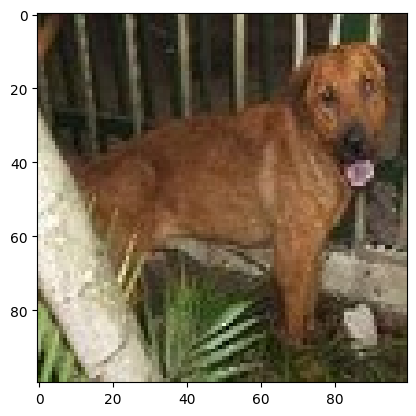

In [8]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 31ms/step - loss: 0.7366 - accuracy: 0.5015
Epoch 2/5
32/32 [==============================] - 1s 22ms/step - loss: 0.6747 - accuracy: 0.5875
Epoch 3/5
32/32 [==============================] - 1s 22ms/step - loss: 0.6108 - accuracy: 0.6765
Epoch 4/5
32/32 [==============================] - 1s 24ms/step - loss: 0.5369 - accuracy: 0.7395
Epoch 5/5
32/32 [==============================] - 1s 21ms/step - loss: 0.4706 - accuracy: 0.7765


In [14]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6550


[0.6488064527511597, 0.6549999713897705]

# Making predictions

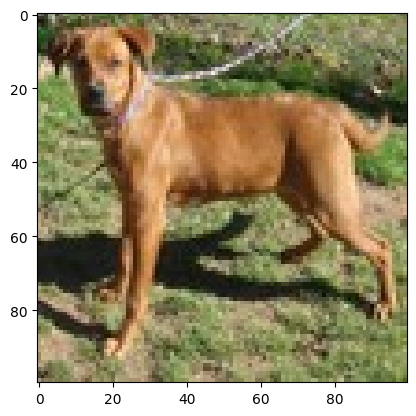

1/1 [==============================] - 0s 205ms/step
Our model says it is a : dog


In [15]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)